# Student Loan Risk with Deep Learning

In [169]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student_loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [170]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/mbc/ai/m6/datasets/student_loans.csv"

df = pd.read_csv(file_path)

# Review the DataFrame
df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [171]:
# Review the data types associated with the columns
df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [172]:
# Define the target set y using the credit_ranking column 
y = df['credit_ranking'].values
# Display a sample of y
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [173]:
# Define features set X by selecting all columns but credit_ranking

X = df.drop(columns=['credit_ranking'], axis =1)

# Review the features DataFrame
X.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [174]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [175]:
# Create a StandardScaler instance
X_scaler = StandardScaler()


# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [176]:
# Define the the number of inputs (features) to the model
number_input_features = 11


# Review the number of features
number_input_features

11

In [177]:
# Define the number of neurons in the output layer
out_layer = 1

In [178]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 6


# Review the number hidden nodes in the first layer
hidden_nodes_layer1

6

In [179]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 3

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

3

In [180]:
# Create the Sequential model instance
nn = Sequential()


In [181]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


In [182]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))


In [183]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=out_layer, activation="linear"))

In [184]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 72        
                                                                 
 dense_16 (Dense)            (None, 3)                 21        
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `mse` loss function, the `adam` optimizer, and the `mse` evaluation metric.


In [185]:
# Compile the Sequential model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [186]:
# Fit the model using 50 epochs and the training data
deep_net_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
38/38 [==============================] - 1s 2ms/step - loss: 21.6172 - mse: 21.6172
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 17.3563 - mse: 17.3563
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 13.4912 - mse: 13.4912
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 10.2166 - mse: 10.2166
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 7.6672 - mse: 7.6672
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 5.8655 - mse: 5.8655
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 4.6510 - mse: 4.6510
Epoch 8/50
38/38 [==============================] - 0s 2ms/step - loss: 3.8449 - mse: 3.8449
Epoch 9/50
38/38 [==============================] - 0s 2ms/step - loss: 3.3068 - mse: 3.3068
Epoch 10/50
38/38 [==============================] - 0s 2ms/step - loss: 2.9408 - mse: 2.9408
Epoch 11/50
38/38 [==============================] - 0s 2ms/s

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [187]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_mse = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_mse}")

13/13 - 1s - loss: 0.6881 - mse: 0.6881 - 526ms/epoch - 40ms/step
Loss: 0.6880970001220703, Accuracy: 0.6880970001220703


### Step 4: Save and export your model to an HDF5 file, and name the file `student_loans.h5`.


In [188]:
# Set the model's file path
file_path = Path("saved_models/student_loans.h5")


# Export your model to a HDF5 file
nn.save(file_path)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [189]:
import tensorflow as tf

# Set the model's file path
file_path = Path("saved_models/student_loans.h5")


# Load the model to a new object
nn_imported = tf.keras.models.load_model(file_path)

### Step 2: Make predictions on the testing data.

In [190]:
# Make predictions on the testing data
predictions = (nn.predict(X_test_scaled)).astype("int32")

13/13 [==============================] - 0s 2ms/step


### Step 3: Create a DataFrame to compare the predictions with the actual values.

In [191]:
# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test})


### Step 4: Display a sample of the DataFrame you created in step 3.

In [192]:
# Display sample data
results.head(10)

,predictions,actual
0,5,5
1,4,6
2,5,6
3,5,6
4,7,6
5,6,6
6,5,6
7,3,5
8,5,5
9,5,5


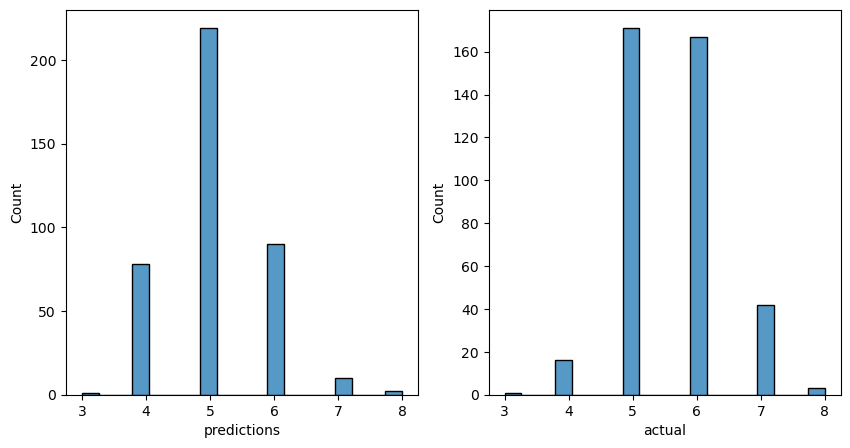

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(results['predictions'], ax=ax1)
sns.histplot((results['actual']),ax=ax2)
plt.show()